<a href="https://colab.research.google.com/github/Akriti96/Decision-Tree-class-119/blob/main/class_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/diabetes.csv")

colnames=["pregent","glucose","bp", "skin","insulin","bmi","pedigree","age","lable"]
df=pd.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/diabetes.csv",names=colnames).iloc[1:]
df.head()

,pregent,glucose,bp,skin,insulin,bmi,pedigree,age,lable
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# select a features
features=["pregent","glucose","bp", "skin","insulin","bmi","pedigree","age"]
x=df[features]
y=df.lable

In [ ]:
# split the data into train and test module

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=1)

# intializing desicion tree model
Tree= DecisionTreeClassifier(max_depth=3)

#  fitting the data to model
Tree=Tree.fit(x_train,y_train)
# print(Tree)


# calcuting accuracy a model
y_pred=Tree.predict(x_test)
print("A:",accuracy_score(y_test,y_pred))

A: 0.7760416666666666


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus
FinalValue = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(Tree, out_file=FinalValue , filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(FinalValue.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.452<br/>samples = 576<br/>value = [377, 199]<br/>class = 0>, fillcolor="#f3c4a2"] ;
1 [label=<age &le; 28.5<br/>gini = 0.325<br/>samples = 382<br/>value = [304, 78]<br/>class = 0>, fillcolor="#eca16c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 45.4<br/>gini = 0.191<br/>samples = 215<br/>value = [192, 23]<br/>class = 0>, fillcolor="#e89051"] ;
1 -> 2 ;
3 [label=<gini = 0.165<br/>samples = 210<br/>value = [191, 19]<br/>class = 0>, fillcolor="#e88e4d"] ;
2 -> 3 ;
4 [label=<gini = 0.32<br/>samples = 5<br/>value = [1, 4]<br/>class = 1>, fillcolor="#6ab6ec"] ;
2 -> 4 ;
5 [label=<bmi &le; 26.2<br/>gini = 0.442<br/>samples = 167<br/>value = [112, 55]<br/>class = 0>, fillcolor="#f2bf9a"] ;
1 -> 5 ;
6 [label=<gini = 0.111<br/>samples = 34<br/>value = [32, 2]<br/>class = 0>, fillcolor="#e78945"]

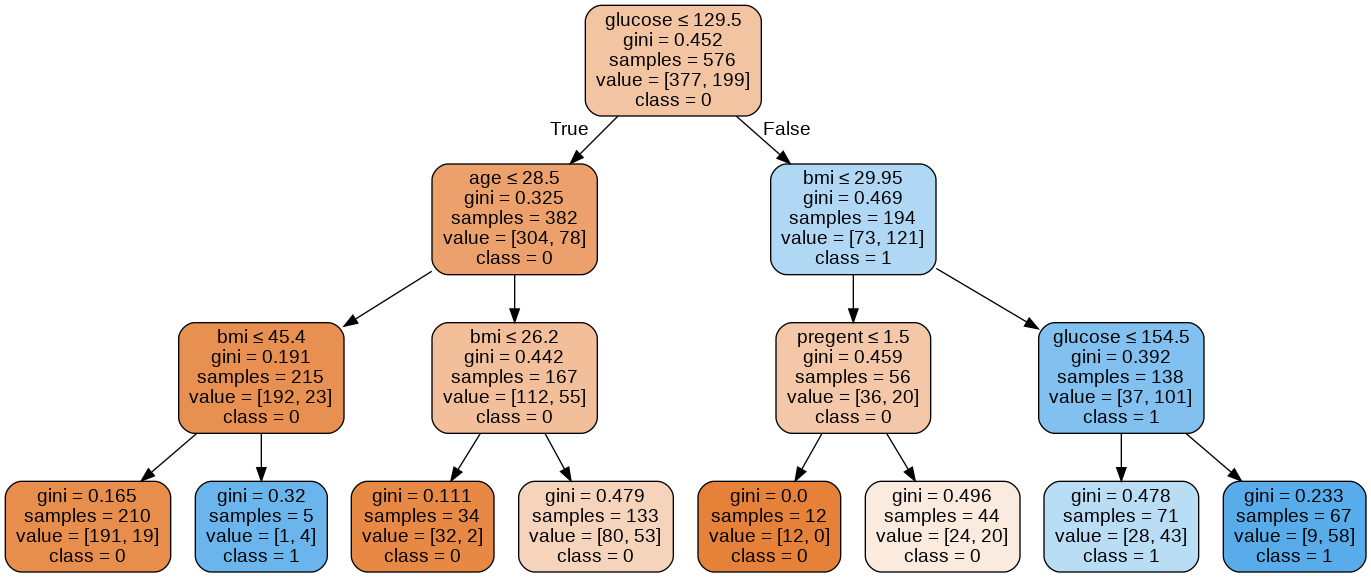

In [ ]:
graph = pydotplus.graph_from_dot_data(FinalValue .getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Conclusion

By looking at this chart, we can say with almost 75% accuracy that a person who's

Glucose is greater than 129.5 

and
BMI is greater than 27.85

Is more prone to be a Diabetes Patient.